<a href="https://colab.research.google.com/github/SrMouraSilva/Introducao-a-Modelagem/blob/main/3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()
 
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 3.2
Reconsider the pig problem of Example 1.1, but now suppose that the weight of the pig after $t$ days is $w=\frac{800}{1+3e^{\frac{-t}{30}}}$ lbs.
 
Descrição do Exemplo 1.1:
 
> A pig weighing 200 pounds gains 5 pounds per day and costs 45 cents a day to keep. The market price for pigs is 65 cents per pound, but is falling 1 cent per day. When should the pig be sold?
 



### a) Show that the pig is gaining about 5 lbs/day at time $t=0$. What happens as $t$ increases?
 
Expresse a relação peso $w$ x tempo $t$  conforme abaixo
$$w=\frac{800}{1+3e^{\frac{-t}{30}}} \text{ lbs} $$
 
Faça $t = 0$ e $w = w_0$
    
$$w_0 = \frac{800}{1+3e^{0}} =  200 \text{ lbs} $$
    
Faça $t = 1$ e $w = w_1$
    
$$w_1 = \frac{800}{1+3e^{\frac{-1}{30}}} \approx 205 \text{ lbs} $$
    
Expresse $\Delta_w$ como variação de peso por dia no tempo $t = 0$ conforme abaixo
    
$$\Delta_w = w_1 - w_0 $$
    
    
Faça $w_0 = 200$ e $w_1 = 205$
    
$$\Delta_w = w_1 - w_0 = 205 - 200 = 5 \text{ lbs}$$  
    
Portanto, foi mostrado que o peso dos suínos está aumentando 5 lbs ao dia no tempo $t = 0$.
 
Pelo gráfico abaixo, o comportamento da função peso $w$ está crescendo a medida que o tempo $t$ aumenta, e segue uma função exponencial conforme o tempo avança.

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


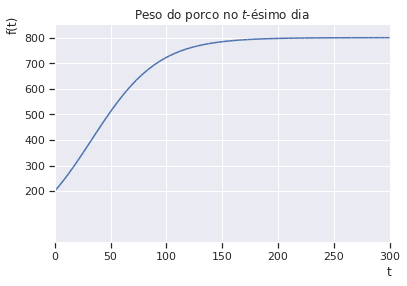

In [ ]:
t = Symbol('t', real=True)

w = 800/(1+3*E**(-t/30))

plot(w, (t, 0, 300), ylim=[0, 850], title='Peso do porco no $t$-ésimo dia')

### b) Find the optimal time to sell the pig. Use the five-step method, and model as a one–variable optimization problem.





#### Passo 1 - Variáveis

* $t$ = tempo (dias)
* $w$ = peso do porco (lbs)
* $p$ = preço do porco (\\$/lb)
* $C$ = custo de manutenção do porco em $t$ dias (\\$)
* $R$ = receita obtida com a venda do porco (\\$)
* $P$ = lucro com a venda do porco (\\$)



#### Passo 1 - Suposições do problema


In [ ]:
t = Symbol('t', nonnegative=True, real=True, imaginary=False)

w = 800/(1+3*exp(-t/30))
p = 0.65-0.01*t
C = 0.45*t
R = p*w
P = R-C

#t >= 0

#### Passo 2 - Abordagem de modelagem

Problema de otimização unidimensional cujo objetivo é maximizar $P$ lucro do proprietário do porco.





#### Passo 3 - Formulação do modelo

$$
\begin{align}
\text{max} ~~& f(t) \\
\text{sujeito a} ~~& t \in \Omega \\
\end{align}
$$

Sendo:
* $f(t)$: Função objetivo
* $\Omega$: Espaço viável das variáveis do problema.

Desta forma, temos:

$$
\begin{align}
\text{max} ~~& f(t) = - 0.45 t + \frac{800 \left(- 0.01 t + 0.65\right)}{1 + 3 e^{- \frac{t}{30}}}\\
\text{sujeito a} ~~& t \geq 0 \\
\end{align}
$$

#### Passo 4 - Resolução do modelo

Função a ser otimizada:

In [ ]:
f = P
Math(f"f(t)={latex(f)}")

<IPython.core.display.Math object>

Calculando $\frac{df(t)}{dt}$,

In [ ]:
dfdt = diff(f, t)
Math("\\frac{df(t)}{dt}=" + latex(simplify(dfdt)))

<IPython.core.display.Math object>

Calculando $\frac{df(t)}{dt} = 0$

(Solução obtida por meio da ferramenta [wolframalpha](https://www.wolframalpha.com/input/?i=%28-+0.8+t+e%5E%7Bt%2F30%7D+%2B+25.3+e%5E%7B%5Cfrac%7Bt%7D%7B30%7D%7D+-+8.45+e%5E%7Bt%2F15%7D+-+4.05%29%2F%286.0+e%5E%7Bt%2F30%7D+%2B+1.0+e%5E%7Bt%2F15%7D+%2B+9.0%29%3D0
))

In [ ]:
# Sympy não conseguiu solucionar
#s_b = solve(dfdt, [t], dict=True, rational=True)[0]
# Solução obtida em: 
# https://www.wolframalpha.com/input/?i=%28-+0.8+t+e%5E%7Bt%2F30%7D+%2B+25.3+e%5E%7B%5Cfrac%7Bt%7D%7B30%7D%7D+-+8.45+e%5E%7Bt%2F15%7D+-+4.05%29%2F%286.0+e%5E%7Bt%2F30%7D+%2B+1.0+e%5E%7Bt%2F15%7D+%2B+9.0%29%3D0
s_b = {
    t: 12.3348914426322
}

Math(f"""
\\begin{{aligned}}
0 &= \\frac{{df(t)}}{{dt}} \\\\
0 &= {latex(dfdt)}  \\\\
t&={latex(s_b[t])}  ~~~~~~~~~~~~ t={latex(-96.9396057767331)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Pelo gráfico abaixo, note que existem dois pontos que satisfazem $\frac{{df(t)}}{{dt}} = 0$, porém há somente um ponto para $t \ge 0$. Assim, $t = 12.33...$ dias.


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


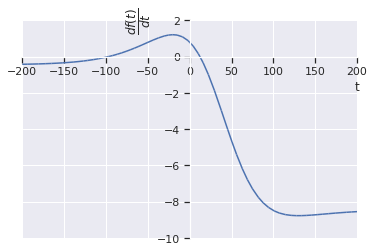

In [ ]:
plot(dfdt, (t, -200, 200), ylim=[-10, 2], ylabel='$\dfrac{df(t)}{dt}$');

Calculando $\frac{d^2f(t)}{dt^2}$, temos

In [ ]:
df2dt2 = diff(dfdt, t)
Math(f"\\frac{{d^2f(t)}}{{dt^2}} = {latex(df2dt2)}")

<IPython.core.display.Math object>

Para o ponto $t \ge 0$ encontrado anteriormente, temos

In [ ]:
Math(f"\\frac{{d^2f(t={s_b[t]})}}{{dt^2}} = {latex(df2dt2.subs(s_b))} < 0.")

<IPython.core.display.Math object>

Logo, este ponto é de máximo.

#### Passo 5 - Resposta da pergunta

A resposta obtida pelo modelo matemático proposto é vender o porco depois de $12.33$ dias, obtendo um lucro de aproximadamente:

In [ ]:
Math(f"\${latex(f.subs(s_b))}.")

<IPython.core.display.Math object>

### c) The parameter $800$ represents the eventual mature weight of the pig. Perform a sensitivity analysis on this parameter. Consider both the best time to sell and the resulting net profit.

Suponhamos que o eventual "peso de maturidade" do porco não seja mais o valor fixo de $800$, mas dependa de uma variável $r$ agora:
$$w=r/(1+3e^{-t/30})$$

Assim, temos a função $f(t;r)$ sendo como:

In [ ]:
r = var('r', real=True)

w = r/(1+3*exp(-t/30))
R = p*w
P = R-C

f_b = P
Math(f"f(t; r)={latex(f)}.")

<IPython.core.display.Math object>

Calculando $\frac{df(t;r)}{dt}$,

In [ ]:
dfdt = diff(f_b, t)
Math("\\frac{df(t;r)}{dt}=" + latex(dfdt))

<IPython.core.display.Math object>

Infelizmente, a ferramenta Sympy não nos auxiliou em calcular $\frac{df(t;r)}{dt} = 0$. Deste modo, faremos este item por meio de uma estimativa numérica da sensibilidade.

Assumamos que $r=880$, ou seja, com incremento de $10\%$ em relação ao item a). Executemos o método de Newton, definindo explicitamente que $r=880$. Deste modo, teremos $f(t; r)$ como sendo:

In [ ]:
def MetodoNewton(variaveis, valores_iniciais, funcao, numero_iteracoes=10):
    num_variaveis = len(variaveis)
    x_ = np.zeros((num_variaveis, numero_iteracoes+1))
    
    x_[:, 0] = valores_iniciais

    f = lambdify(variaveis, funcao, 'numpy')

    gradiente = Matrix(derive_by_array(funcao, variaveis))
    gradiente_f_original = lambdify(variaveis, gradiente, 'numpy')
    gradiente_f = lambda vetor: gradiente_f_original(*vetor.T.flatten())

    hessiana = hessian(funcao, variaveis)

    hessiana_inversa_f_original = lambdify(variaveis, hessiana.inv(), 'numpy')
    hessiana_inversa_f = lambda vetor: hessiana_inversa_f_original(*vetor.T.flatten())
    
    for k in range(numero_iteracoes):
        x_k = x_[:, [k]]

        x_k_next = x_k - hessiana_inversa_f(x_k) @ gradiente_f(x_k)
        x_[:, k+1] = x_k_next.T
    
    retorno = {f'{variavel}': x_[i] for i, variavel in enumerate(variaveis)}
    retorno[f'f{Tuple(*variaveis)}'] = [f(*x_i) for x_i in x_.T]
    
    return pd.DataFrame(retorno)

In [ ]:
#@title Valor de `r` { vertical-output: true, display-mode: "form" }
 
valor_r = 880 #@param {type:"number"}

valores = {
    r: valor_r
}
 
Math(f"f(t) = f(t; r={valor_r}) = {latex(f.subs(valores))}")

<IPython.core.display.Math object>

O resultado do método de Newton é apresentado na tabela abaixo. Os valores de $t$ e $f(t)$ são apresentados para cada $i$-ésima iteração ($i$-ésima linha).

In [ ]:
resultado_newton_c = MetodoNewton(
    variaveis=(t,),
    valores_iniciais=(0,),
    funcao=f_b.subs(valores),
    numero_iteracoes=5
)
resultado_newton_c

,t,"f(t,)"
0,0.000000,143.000000
1,18.347107,147.993557
2,13.258204,149.522590
3,12.819565,149.531860
4,12.816078,149.531860
5,12.816078,149.531860


Podemos obter uma estimativa das sensibilidades, comparando com os resultados do item b) com este item. Para calcular $S(t, r)$, a sensibilidade de $t$ em função de $r$, façamos
$$
S(t, r) = \frac{t^{*_c}}{t^{*_b}} - 1,
$$
sendo $t^{*_n}$ a variável $t$ no ponto ótimo no item $n$ desta questão e
$$
S(y, r) = \frac{f(t; r=880)}{f(t; r=800)} - 1.
$$

In [ ]:
valor_t_b, valor_f_b = s_b[t], N(f.subs(s_b))
valor_t_c, valor_f_c = resultado_newton_c.iloc[-1]


display(Math(f"""
\\begin{{aligned}}
S(t, r) &= \\frac{{{valor_t_c}}}{{{valor_t_b}}} - 1 = {(valor_t_c/valor_t_b - 1) * 100}\%\\\\
S(y, r) &= \\frac{{{valor_f_c}}}{{{valor_f_b}}} - 1 = {(valor_f_c/valor_f_b - 1) * 100}\%
\\end{{aligned}}
"""))

<IPython.core.display.Math object>

Desta forma, temos que a medida que $a$ aumenta $10\%$, para o ponto ótimo
* $t$, o tempo para a venda do porco, aumenta $3.901\%$
* $y$, o lucro, aumenta $10.418\%$


### d)  Compare the results obtained in (b) to what was done in Sections 1.1 and 3.1. Comment on the robustness of our model. What general conclusions can we draw?
Na seção 1.1, a relação peso x tempo é linear. Além disso, o melhor momento para vender o porco é em 8 dias, com lucro líquido igual a 133.20 dólares. Já na seção 3.1, o melhor momento para vender o porco aumentou para 19.5 dias, com lucro líquido igual a 139.395 dólares com o uso da função exponencial para a relação peso x tempo. Já nesta questão, o melhor momento para vender o porco é em 12.33 dias, com lucro líquido igual a 135.42 dólares com o uso da função exponencial para a relação peso x tempo.  Portanto, o nosso modelo não é robusto com relação à suposição de linearidade feita na seção 1.1 e nem é robusto com relação à suposição de função exponencial feita na seção 3.1, pois o valor de $t$ ótimo e de $P$ ótimo desta questão e da seção 3.1 são bem distintos mesmo que a relação peso x tempo seja uma função exponencial. No gráfico abaixo, podemos observar o que foi dito anteriormente neste item.

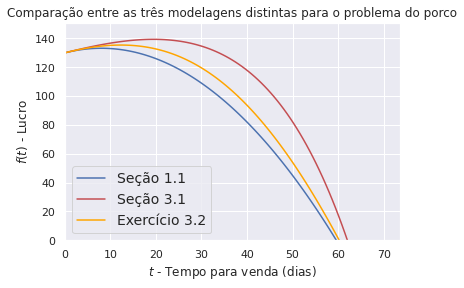

In [ ]:
t = Symbol('t', nonnegative=True, real=True, imaginary=False)

# Seção 1.1
P_1 = (0.65 - 0.01*t)*(200 + 5*t) - 0.45*t

# Seção 3.1
P_2 = (0.65 - 0.01*t)*(200*E**(0.025*t)) - 0.45*t

# Exercício 3.2
w = 800/(1+3*exp(-t/30))
p = 0.65-0.01*t
C = 0.45*t
R = p*w
P_3 = R-C

# Gráfico
P_1_func = lambdify(t, P_1, modules=['numpy'])
P_2_func = lambdify(t, P_2, modules=['numpy'])
P_3_func = lambdify(t, P_3, modules=['numpy'])

t = np.linspace(0, 70, 100)
plt.plot(t, P_1_func(t), 'b', label="Seção 1.1")
plt.plot(t, P_2_func(t), 'r', label="Seção 3.1")
plt.plot(t, P_3_func(t), 'orange', label="Exercício 3.2")

plt.legend(loc='best')
plt.title('Comparação entre as três modelagens distintas para o problema do porco')
plt.xlabel('$t$ - Tempo para venda (dias)')
plt.ylabel('$f(t)$ - Lucro')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()